              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        40
         1.0       0.91      0.91      0.91        35

    accuracy                           0.92        75
   macro avg       0.92      0.92      0.92        75
weighted avg       0.92      0.92      0.92        75



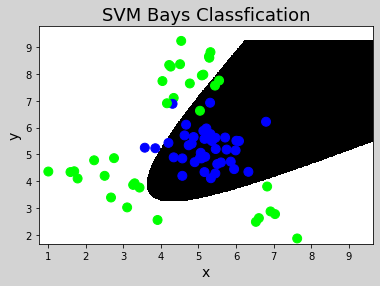

In [2]:
#多项式核函数的svm分类器
#借助高维空间，显示在2d图像上的投影
import numpy as np
import sklearn.naive_bayes as nb
import matplotlib.pyplot as mp
import sklearn.svm as svm
import sklearn.metrics as sm
import sklearn.model_selection as ms

data=np.loadtxt('../ml_data/multiple2.txt',delimiter=',')
x=data[:,:2].astype('f8')
y=data[:,-1].astype('f8')

#拆分测试集与训练集
train_x,test_x,train_y,test_y=ms.train_test_split(x,y,test_size=0.25,random_state=7)

# 构建高斯朴素贝叶斯模型
model=svm.SVC(kernel='poly',degree=3)
model.fit(train_x,train_y)

pred_test_y=model.predict(test_x)
print(sm.classification_report(test_y,pred_test_y))
#拆分测试集与训练集
n=500
l,r=x[:,0].min(),x[:,0].max()
b,t=x[:,1].min(),x[:,1].max()
grid_x,grid_y=np.meshgrid(np.linspace(l,r,n),np.linspace(b,t,n))
# GaussianNB就是先验为高斯分布(正态分布)的朴素贝叶斯
mesh_x=np.column_stack((grid_x.ravel(),grid_y.ravel()))
mesh_z=model.predict(mesh_x)
grid_z=mesh_z.reshape(grid_x.shape)
model=nb.GaussianNB()
model.fit(x,y)

mp.figure('SVM Bays Classfication',facecolor='lightgray')
mp.title('SVM Bays Classfication',fontsize=18)
mp.xlabel('x',fontsize=14)
mp.ylabel('y',fontsize=14)
mp.tick_params(labelsize=10)  #params参数
mp.pcolormesh(grid_x,grid_y,grid_z,cmap='gray')
mp.scatter(test_x[:,0],test_x[:,1],c=test_y,cmap='brg',s=80)
mp.show()